In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
%matplotlib inline

In [97]:
def avg_damage(ac, n_d6, prof, mod, base_damage):
    '''ac: Armor Class
n_d6: number of d6 dice for rogue's sneak attack
prof: proficiency bonus, starts with +2 and gets larger as levels go up
mod: dexerity modifier (+3 in my case)
base_damage: base damage of the weapon (my rapier and longbow both do 1d8 base damage so 8 for me)
    '''
    ac *= 1.0
    prof *= 1.0
    mod *= 1.0
    reg_to_hit = 1 - (ac - prof - mod) / 20
    adv_to_hit = 1 - (1 - reg_to_hit)**2

    longbow_extra_to_hit = 1 - (ac - prof - mod + 5) / 20  # d20 - 5 to take the +10 extra damage
    longbow_extra_to_hit_adv = 1 - (1 - longbow_extra_to_hit) ** 2

    reg_damage = (base_damage + 1.0)/2 + 3.5 * n_d6 + mod
    extra_longbow_damage = (base_damage + 1.0) / 2 + 3.5 * n_d6 + mod + 10

    avg_reg_damage = reg_to_hit * reg_damage
    avg_adv_damage = adv_to_hit * reg_damage
    
    avg_2_attacks_1_adv = reg_to_hit*adv_to_hit * 2 * reg_damage
    avg_2_attacks_2_adv = adv_to_hit **2 * 2 * reg_damage
    avg_2_attacks_no_adv = reg_to_hit**2 * 2 * reg_damage

    avg_longbow_extra_damage = longbow_extra_to_hit * extra_longbow_damage
    avg_longbow_extra_damage_adv = longbow_extra_to_hit_adv * extra_longbow_damage
    return [avg_reg_damage, avg_adv_damage,
            avg_2_attacks_1_adv, avg_2_attacks_2_adv, avg_2_attacks_no_adv,
            avg_longbow_extra_damage, avg_longbow_extra_damage_adv]
#     print('average regular damage: {}'.format(avg_reg_damage))
#     print('average damage w/ advantage: {}'.format(avg_adv_damage))
#     print('average 2 attacks (1 advantage) damage: {}'.format(avg_2_attacks_1_adv))
#     print('average 2 attacks (2 advantage) damage: {}'.format(avg_2_attacks_2_adv))
#     print('average longbow extra damage: {}'.format(avg_longbow_extra_damage))
#     print('average longbow extra damage w/ advantage: {}'.format(avg_longbow_extra_damage_adv))

In [98]:
line = []
for d6 in (2,):
    for ac in (12, 13, 14):
        line.append([d6, ac] + avg_damage(ac, d6, 2, 3, 8))

In [100]:
damage = pd.DataFrame(line, columns=['d6', 'ac',
                                     'avg_reg_damage', 'avg_adv_damage',
                                     'avg_2_attacks_1_adv', 'avg_2_attacks_2_adv', 'avg_2_attacks_no_adv',
                                     'avg_longbow_extra_damage', 'avg_longbow_extra_damage_adv'],
                     index=None)

In [103]:
damage

,d6,ac,avg_reg_damage,avg_adv_damage,avg_2_attacks_1_adv,avg_2_attacks_2_adv,avg_2_attacks_no_adv,avg_longbow_extra_damage,avg_longbow_extra_damage_adv
0,2,12,9.425,12.72375,16.540875,22.330181,12.2525,9.800,15.68000
1,2,13,8.700,12.18000,14.616000,20.462400,10.4400,8.575,14.14875
2,2,14,7.975,11.56375,12.720125,18.444181,8.7725,7.350,12.49500


In [101]:
line = []
for d6 in (3, 4):
    for ac in (12, 13, 14):
        line.append([d6, ac] + avg_damage(ac, d6, 3, 3, 8))

In [102]:
damage_3_4 = pd.DataFrame(line, columns=['d6', 'ac',
                                     'avg_reg_damage', 'avg_adv_damage',
                                     'avg_2_attacks_1_adv', 'avg_2_attacks_2_adv', 'avg_2_attacks_no_adv',
                                     'avg_longbow_extra_damage', 'avg_longbow_extra_damage_adv'],
                     index=None)

In [104]:
damage_3_4

,d6,ac,avg_reg_damage,avg_adv_damage,avg_2_attacks_1_adv,avg_2_attacks_2_adv,avg_2_attacks_no_adv,avg_longbow_extra_damage,avg_longbow_extra_damage_adv
0,3,12,12.600,16.38000,22.932000,29.811600,17.6400,12.600,19.53000
1,3,13,11.700,15.79500,20.533500,27.720225,15.2100,11.200,17.92000
2,3,14,10.800,15.12000,18.144000,25.401600,12.9600,9.800,16.17000
3,4,12,15.050,19.56500,27.391000,35.608300,21.0700,14.175,21.97125
4,4,13,13.975,18.86625,24.526125,33.110269,18.1675,12.600,20.16000
5,4,14,12.900,18.06000,21.672000,30.340800,15.4800,11.025,18.19125


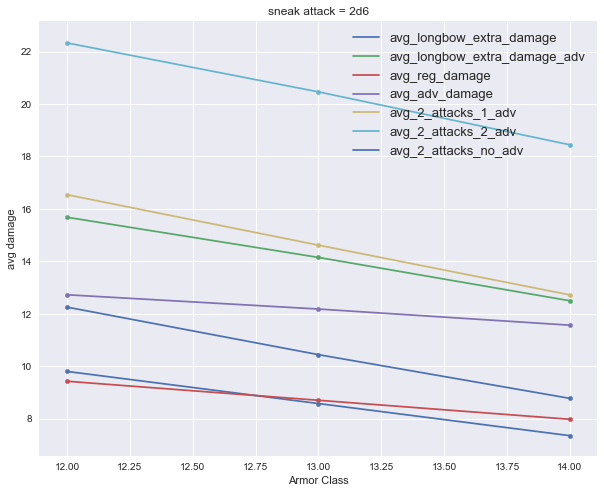

In [105]:
d6 = 2
width = 0.35
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for item in ['avg_longbow_extra_damage', 'avg_longbow_extra_damage_adv', 'avg_reg_damage', 'avg_adv_damage',
'avg_2_attacks_1_adv', 'avg_2_attacks_2_adv', 'avg_2_attacks_no_adv']:
    plt.plot(damage[damage['d6'] == d6]['ac'], damage[damage['d6'] == d6][item], label=item)
    plt.scatter(damage[damage['d6'] == d6]['ac'], damage[damage['d6'] == d6][item], label=None, s=20)
#     plt.bar(damage[damage['d6'] == d6]['ac'], damage[damage['d6'] == d6][item],
#             width=width, )
plt.legend(fontsize=13)
plt.title('sneak attack = {}d6'.format(d6))
plt.xlabel('Armor Class')
plt.ylabel('avg damage')

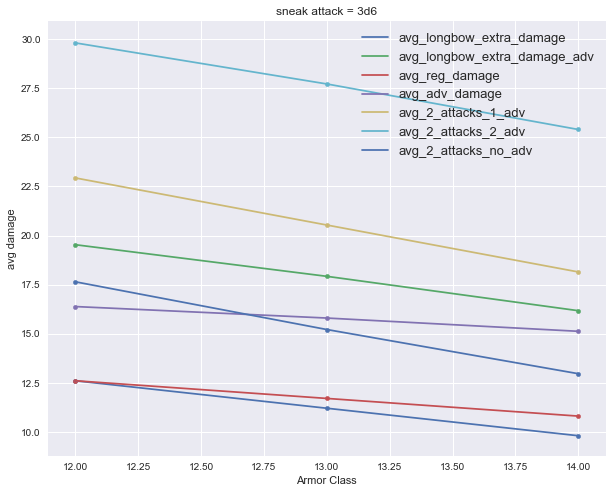

In [106]:
d6 = 3
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for item in ['avg_longbow_extra_damage', 'avg_longbow_extra_damage_adv', 'avg_reg_damage', 'avg_adv_damage',
'avg_2_attacks_1_adv', 'avg_2_attacks_2_adv', 'avg_2_attacks_no_adv']:
    plt.plot(damage_3_4[damage_3_4['d6'] == d6]['ac'], damage_3_4[damage_3_4['d6'] == d6][item], label=item)
    plt.scatter(damage_3_4[damage_3_4['d6'] == d6]['ac'], damage_3_4[damage_3_4['d6'] == d6][item], label=None, s=20)
plt.legend(fontsize=13)
plt.title('sneak attack = {}d6'.format(d6))
plt.xlabel('Armor Class')
plt.ylabel('avg damage')

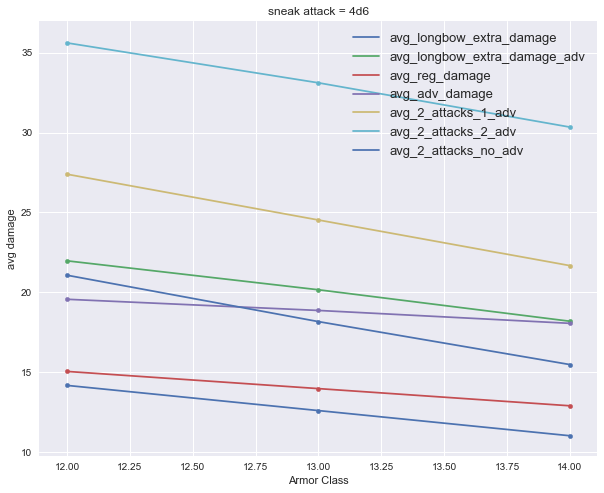

In [107]:
d6 = 4
fig, ax = plt.subplots(1, 1, figsize=(10, 8))
for item in ['avg_longbow_extra_damage', 'avg_longbow_extra_damage_adv', 'avg_reg_damage', 'avg_adv_damage',
'avg_2_attacks_1_adv', 'avg_2_attacks_2_adv', 'avg_2_attacks_no_adv']:
    plt.plot(damage_3_4[damage_3_4['d6'] == d6]['ac'], damage_3_4[damage_3_4['d6'] == d6][item], label=item)
    plt.scatter(damage_3_4[damage_3_4['d6'] == d6]['ac'], damage_3_4[damage_3_4['d6'] == d6][item], label=None, s=20)
plt.legend(fontsize=13)
plt.title('sneak attack = {}d6'.format(d6))
plt.xlabel('Armor Class')
plt.ylabel('avg damage')